First few rows of the dataset:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065      

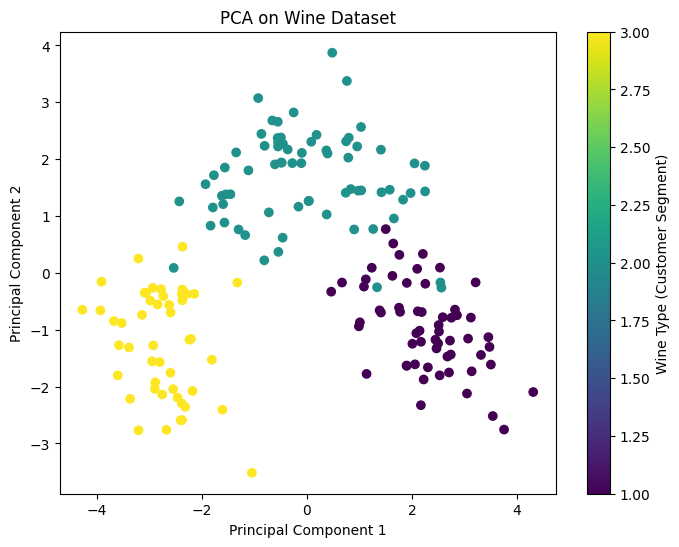

In [1]:
# Importing required libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the wine dataset
url = "https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Separate the features and the target variable
X = data.drop(columns=['Customer_Segment'])  # Assuming 'Customer_Segment' indicates wine type
y = data['Customer_Segment']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)  # Selecting 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Displaying the explained variance by each component
print("Explained variance by each component:", pca.explained_variance_ratio_)

# Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Wine Dataset")
plt.colorbar(label='Wine Type (Customer Segment)')
plt.show()


First few rows of the dataset:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065      

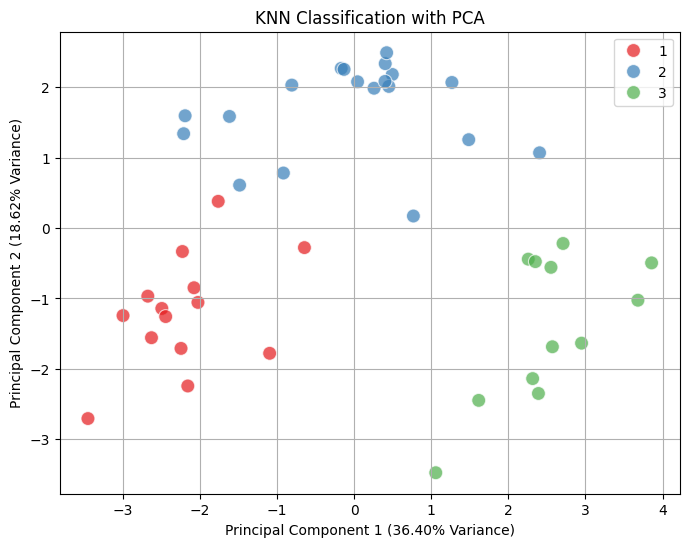

In [3]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import time

# Load the Wine dataset
df = pd.read_csv('Wine.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display a random sample of 10 rows from the dataset
print("\nRandom sample of 10 rows from the dataset:")
print(df.sample(10))

# Check for missing values
print("\nNumber of missing values in each column:")
print(df.isnull().sum())

# Separate features and target variable
X = df.iloc[:, :-1].values  # All features
y = df.iloc[:, -1].values   # Target variable (Customer_Segment)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying KNN without PCA
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Measure the prediction time
start = time.time()
y_pred = knn.predict(X_test_scaled)
print("\nTime taken for prediction without PCA:", time.time() - start)

# Calculate and print accuracy without PCA
# Trains a KNN classifier without using PCA, predicts on the test set, and displays the time taken and accuracy.

accuracy_without_pca = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy without PCA: {accuracy_without_pca * 100:.2f}%")

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)  # Set PCA to reduce data to 2 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Applying KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# Measure the prediction time with PCA
start = time.time()
y_pred_pca = knn_pca.predict(X_test_pca)
print("\nTime taken for prediction with PCA:", time.time() - start)

# Calculate and print accuracy with PCA
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)
print(f"KNN Accuracy with PCA: {accuracy_with_pca * 100:.2f}%")

# Visualize the PCA result with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred_pca, palette='Set1', s=100, alpha=0.7)
plt.title('KNN Classification with PCA')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.grid(True)
plt.show()


PCA (Principal Component Analysis) is especially suited to this question because it’s a powerful technique for reducing the dimensionality of datasets, making it easier to interpret and visualize complex data. Here’s how and why PCA is useful for the wine dataset, which contains measurements for various chemical properties of wine:

### 1. **Dimensionality Reduction for Simplicity and Visualization**
   - The wine dataset likely includes a significant number of features, each representing a specific chemical measurement (e.g., alcohol, ash, magnesium). These features can be difficult to interpret collectively because of the high dimensionality.
   - PCA simplifies this by reducing the data to a smaller set of "principal components" that capture most of the variability in the data. For example, by reducing from, say, 13 original features to 2 or 3 principal components, we can still retain most of the dataset's information while making it more manageable for visualization.

### 2. **Capturing Maximum Variance in Principal Components**
   - PCA identifies directions in the feature space (principal components) where the data varies the most. These components are ordered by the amount of variance they capture.
   - In this case, the first few principal components will explain most of the variations in the chemical measurements, making it easier to distinguish between different types of wine. This approach is particularly helpful if there are patterns or groupings (like clusters for red and white wines) in the data that correlate with the wine type.

### 3. **Improving Interpretability and Classification**
   - By reducing the dataset to a few principal components, PCA transforms the data into a form where differences between wine types might become more apparent. Instead of analyzing multiple chemical measurements, we inspect just a few principal components to distinguish wine types.
   - Each wine sample, previously defined by multiple measurements, is now represented by just a couple of principal components. These components help reveal inherent structure in the data that might make it easier for a machine learning model (or even visual inspection) to classify wines as red or white.

### **Application of PCA in This Context**
   - First, the dataset’s features are standardized. Standardization ensures that each feature contributes equally, as PCA is sensitive to the scale of data.
   - Then, PCA transforms these standardized features into a new set of components, each capturing a specific amount of variance from the original data.
   - Finally, only the top components (often two or three) are selected. These components capture most of the original variance, making it easier to distinguish wine types by observing patterns in a low-dimensional space.

In summary, PCA in this context helps to **reduce the complexity** of analyzing multiple chemical measurements, **emphasize major differences** in wine types, and **facilitate visualization and interpretation** by focusing on a few principal components rather than numerous individual features.

Certainly! Here's a breakdown of each part of the code:

1. **Importing Libraries**: Essential libraries are loaded: pandas for data handling, PCA for dimensionality reduction, StandardScaler for scaling, and matplotlib for visualization.

2. **Loading the Dataset**: The wine dataset is loaded from an online source, which includes various chemical measurements of wines along with a label identifying the type of wine.

3. **Previewing the Data**: Displays the first few rows of the dataset, providing a quick look at the features (like alcohol content, magnesium level, etc.) and the target label, which categorizes each wine sample.

4. **Separating Features and Target Variable**: The features (all wine properties except the type) are separated from the target variable, which categorizes each wine sample by type.

5. **Standardizing the Data**: Standardizes the feature values so they have a mean of 0 and a standard deviation of 1. This scaling step helps ensure PCA’s effectiveness by preventing variables with larger ranges from dominating the results.

6. **Applying PCA**: Reduces the dataset's dimensions by transforming it into two principal components. This step aims to capture as much of the data’s variance as possible in just two components, making it easier to visualize and interpret.

7. **Explained Variance Output**: Displays the percentage of variance explained by each of the two principal components, indicating how much of the original dataset's variability has been retained.

8. **Visualizing the PCA Result**: Creates a scatter plot of the two principal components, where each point represents a wine sample, colored by its type. This visual allows easy comparison of the samples, highlighting clusters or separation among different wine types.